# Aim is to build the neural network model which can identify the hand written digits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
mnist = pd.read_csv('MNIST_Train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

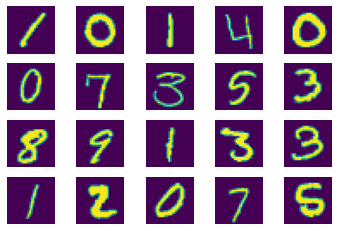

In [4]:
mnist1 = mnist.iloc[::,1::]
mnist1 = np.array(mnist1)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(mnist1[i , :].reshape(28,28))
    plt.axis('off')

In [5]:
# Model Building
from sklearn.model_selection import train_test_split
train , test = train_test_split(mnist , test_size=.2)
train_X = train.iloc[:: , 1::]
test_X = test.iloc[:: , 1::]
train_y = train.iloc[:: , 0]
test_y = test.iloc[:: , 0]

In [6]:
train_X = tf.keras.utils.normalize(train_X)
test_X = tf.keras.utils.normalize(test_X)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 2nd hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 3rd hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 4th hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 5th hidden layer
model.add(tf.keras.layers.Dense(128 , activation=tf.nn.relu)) # 6th hidden layer
model.add(tf.keras.layers.Dense(10 , activation=tf.nn.softmax)) # output layer

model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
# adam is like a gradient descent

In [8]:
train_X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# I need to convert them into array format 
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)

In [10]:
model1 = model.fit(train_X , train_y , epochs = 10 , validation_split=.2 , batch_size = 64)

Epoch 1/10
420/420 [==============================] - 4s 4ms/step - loss: 0.5383 - accuracy: 0.8262 - val_loss: 0.2298 - val_accuracy: 0.9302
Epoch 2/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1802 - accuracy: 0.9437 - val_loss: 0.1558 - val_accuracy: 0.9540
Epoch 3/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9620 - val_loss: 0.1555 - val_accuracy: 0.9513
Epoch 4/10
420/420 [==============================] - 1s 4ms/step - loss: 0.0987 - accuracy: 0.9695 - val_loss: 0.1514 - val_accuracy: 0.9525
Epoch 5/10
420/420 [==============================] - 3s 6ms/step - loss: 0.0785 - accuracy: 0.9751 - val_loss: 0.1330 - val_accuracy: 0.9597
Epoch 6/10
420/420 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.9802 - val_loss: 0.1302 - val_accuracy: 0.9638
Epoch 7/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.1409 - val_accuracy: 0.9631
Epoch 

In [11]:
pred_y = model.predict(test_X)
pred_y

263/263 [==============================] - 1s 2ms/step


array([[4.7178776e-07, 8.5279753e-06, 9.6547292e-06, ..., 2.1525659e-07,
        9.9914169e-01, 9.0583035e-07],
       [9.9990475e-01, 3.9451593e-09, 1.7487300e-05, ..., 2.9072893e-07,
        2.1411313e-06, 3.8941544e-05],
       [1.8102179e-08, 6.5993208e-07, 1.6228762e-08, ..., 3.0254049e-11,
        2.8958542e-07, 9.5325067e-12],
       ...,
       [6.6425420e-12, 1.6369144e-07, 8.2365981e-10, ..., 5.7362265e-10,
        8.7437407e-08, 7.8608345e-08],
       [2.2238428e-08, 8.0968491e-08, 1.4380874e-08, ..., 9.9969363e-01,
        1.6986733e-10, 3.0562250e-04],
       [4.2589381e-03, 5.9605221e-04, 2.6487130e-01, ..., 5.5656760e-06,
        7.1057659e-01, 1.2091429e-06]], dtype=float32)

In [12]:
pred_y[0]

array([4.7178776e-07, 8.5279753e-06, 9.6547292e-06, 8.3822332e-04,
       1.8873996e-08, 1.4313277e-07, 2.7653559e-08, 2.1525659e-07,
       9.9914169e-01, 9.0583035e-07], dtype=float32)

In [13]:
pred_y[0].sum()

0.9999999

In [14]:
pred_y = np.argmax(pred_y , axis = 1)

In [15]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(test_y , pred_y)

array([[785,   0,   0,   0,   0,   4,   0,   1,   4,   0],
       [  0, 927,   3,   4,   0,   0,   0,   5,   3,   0],
       [  0,   0, 792,  16,   3,   0,   0,  11,   9,   0],
       [  0,   0,   2, 862,   0,   3,   0,   1,   9,   2],
       [  0,   4,   2,   2, 751,   0,   3,   0,   1,  31],
       [  4,   1,   1,  18,   2, 706,   5,   0,  14,   8],
       [ 11,   2,   4,   0,   1,   5, 790,   1,   5,   0],
       [  1,   3,   3,   8,   2,   2,   0, 880,   2,  12],
       [  1,   4,   0,   6,   1,   3,   1,   3, 818,   0],
       [  2,   0,   0,  12,   3,   0,   0,  10,   7, 798]], dtype=int64)

In [16]:
accuracy_score(test_y , pred_y)

0.9653571428571428

In [ ]:
# This is just comparision for me 

In [17]:
model1.history

{'loss': [0.5383003354072571,
  0.18023799359798431,
  0.12478459626436234,
  0.09871210157871246,
  0.07852035760879517,
  0.0634850338101387,
  0.04995916038751602,
  0.046651098877191544,
  0.04210275039076805,
  0.03326400741934776],
 'accuracy': [0.8262276649475098,
  0.9437127709388733,
  0.9619791507720947,
  0.9694940447807312,
  0.9750744104385376,
  0.9802455306053162,
  0.9847842454910278,
  0.985342264175415,
  0.9867187738418579,
  0.989248514175415],
 'val_loss': [0.229764923453331,
  0.1558203250169754,
  0.15547576546669006,
  0.1514437198638916,
  0.1330450177192688,
  0.13023251295089722,
  0.1409371793270111,
  0.14280851185321808,
  0.12241285294294357,
  0.14715419709682465],
 'val_accuracy': [0.9302083253860474,
  0.9540178775787354,
  0.9513393044471741,
  0.952529788017273,
  0.9596726298332214,
  0.9638392925262451,
  0.9630952477455139,
  0.9635416865348816,
  0.9675595164299011,
  0.9587797522544861]}

In [18]:
df1 = pd.DataFrame(model1.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.538300,0.826228,0.229765,0.930208
1,0.180238,0.943713,0.155820,0.954018
2,0.124785,0.961979,0.155476,0.951339
3,0.098712,0.969494,0.151444,0.952530
4,0.078520,0.975074,0.133045,0.959673
5,0.063485,0.980246,0.130233,0.963839
6,0.049959,0.984784,0.140937,0.963095
7,0.046651,0.985342,0.142809,0.963542
8,0.042103,0.986719,0.122413,0.967560
9,0.033264,0.989249,0.147154,0.958780
